In [31]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 

sns.set_theme()

from datetime import datetime, timedelta
from src.models import SimulateStatement, Model
from src.modelstats import ModelStats
from src.prob import ProbabilityAnalysis, 
from src.plots import plot_volatilities, plot_prob_evolution
from dataclasses import dataclass
from src.crop import crop_statements_until_t_by_politician, crop_statements_until_t
from datetime import datetime
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from src.modelstats import ModelStats


data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

lambd = 0.1
delta = 0.01
lag = 14   # days

date_of_reckoning = datetime(2019,7,10)

probability_analysis = ProbabilityAnalysis(data_path, data_deputados_path)
probability_analysis = probability_analysis.get_timeframes(lag= lag, day_of_reckoning=date_of_reckoning)

ids = probability_analysis.get_politicians()
probability_analysis= probability_analysis.get_statement_volatility()
tau = probability_analysis.get_all_statements_per_politician(267)


In [72]:

high_volatility_ids = probability_analysis.get_high_statement_volatility_politicians()
from_id_to_name_high_vol, from_name_to_id_high_vol, high_volatility_politican_info = probability_analysis.get_high_statement_volatility_info()

running models at different timecuts


In [73]:

from_politician_to_prob_time_series = {}

for id_politican in ids:
    
    from_time_cut_to_probability = probability_analysis.get_politician_probability_evolution(lambd, delta,  id_politico = id_politican )
    from_politician_to_prob_time_series[id_politican] = from_time_cut_to_probability

0it [00:00, ?it/s]

14it [00:08,  1.59it/s]
14it [00:08,  1.59it/s]
11it [00:04,  1.68it/s]

In [68]:
from_time_to_approval_prob = probability_analysis.calculate_approval_probability_for_each_timestamp(from_politician_to_prob_time_series, approval_threshold = 305)

In [69]:
from_time_to_approval_prob

{Timestamp('2019-05-07 17:36:46'): 0.9442154045881739,
 Timestamp('2019-05-28 17:36:46'): 0.9411342460134711,
 Timestamp('2019-06-18 17:36:46'): 0.9645144962200597}

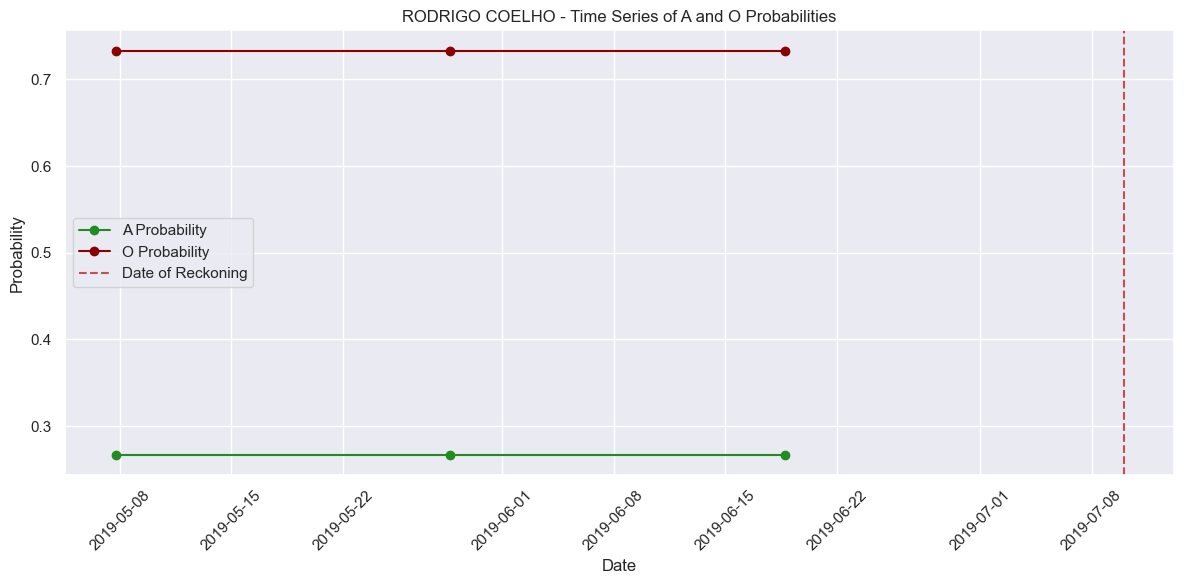

In [46]:

plot_prob_evolution(from_politician_to_prob_time_series[477], date_of_reckoning=date_of_reckoning, name = from_id_to_name_high_vol[428])

In [ ]:
# set_probability
bars = plt.bar(set_probability.keys(), set_probability.values(), width=0.5, color=['#77dd77', '#ff6961'])
plt.xlabel('Trajectory Type')
plt.ylabel('Probability')
plt.title('Probability of Politician Vote - ' + probability_analysis.get_politician_names()[267])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()